# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [3]:
# Note the way each array is printed:
a,b,c,d

(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[3, 1, 6, 8],
         [6, 5, 2, 1],
         [8, 5, 4, 5]],
 
        [[9, 4, 1, 2],
         [1, 4, 8, 3],
         [1, 6, 1, 4]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [4]:
c[1,2,3]

4

In [5]:
## Arithmetic in arrays is element wise

In [6]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [7]:
c = a-b
c

array([20, 29, 38, 47])

In [8]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [9]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [10]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [11]:
a[2:5]

array([ 4,  9, 16])

In [12]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [13]:
b = np.random.randint(1,100,(4,4))

In [14]:
b

array([[11,  1, 38, 11],
       [59, 23, 77, 44],
       [63, 10, 82,  2],
       [55, 79, 52, 89]])

In [15]:
# Guess the output
print(b[2,3])
print(b[0,0])


2
11


In [16]:
b[0:3,1],b[:,1]

(array([ 1, 23, 10]), array([ 1, 23, 10, 79]))

In [17]:
b[1:3,:]

array([[59, 23, 77, 44],
       [63, 10, 82,  2]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [21]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051
2014-01-03,1.698383,-0.632040,0.918363,-0.256972
2014-01-04,0.608305,0.791226,-1.517389,0.602205
2014-01-05,-0.409297,0.185688,0.879117,-0.427547
2014-01-06,0.522528,-0.708901,1.524956,-1.201766


In [22]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [23]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [24]:
df.head()

,A,B,C,D
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051
2014-01-03,1.698383,-0.632040,0.918363,-0.256972
2014-01-04,0.608305,0.791226,-1.517389,0.602205
2014-01-05,-0.409297,0.185688,0.879117,-0.427547


In [25]:
df.tail()

,A,B,C,D
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051
2014-01-03,1.698383,-0.632040,0.918363,-0.256972
2014-01-04,0.608305,0.791226,-1.517389,0.602205
2014-01-05,-0.409297,0.185688,0.879117,-0.427547
2014-01-06,0.522528,-0.708901,1.524956,-1.201766


In [26]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.367586,0.120790,0.143675,-0.672793
std,0.772063,0.852784,1.156976,1.014063
min,-0.409297,-0.708901,-1.517389,-2.379628
25%,-0.202753,-0.559329,-0.597994,-1.008211
50%,0.303214,-0.077754,0.330306,-0.400299
75%,0.586861,0.639841,0.908551,-0.285992
max,1.698383,1.429964,1.524956,0.602205


In [28]:
df.sort_values(by='B')


,A,B,C,D
2014-01-06,0.522528,-0.708901,1.524956,-1.201766
2014-01-03,1.698383,-0.632040,0.918363,-0.256972
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628
2014-01-05,-0.409297,0.185688,0.879117,-0.427547
2014-01-04,0.608305,0.791226,-1.517389,0.602205
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051


### Selection

In [29]:
df[['A','B']]

,A,B
2014-01-01,0.083900,-0.341197
2014-01-02,-0.298304,1.429964
2014-01-03,1.698383,-0.632040
2014-01-04,0.608305,0.791226
2014-01-05,-0.409297,0.185688
2014-01-06,0.522528,-0.708901


In [30]:
df[0:3]

,A,B,C,D
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051
2014-01-03,1.698383,-0.632040,0.918363,-0.256972


In [31]:
# By label
df.loc[dates[0]]

A    0.083900
B   -0.341197
C   -0.218506
D   -2.379628
Name: 2014-01-01 00:00:00, dtype: float64

In [32]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,0.083900,-0.341197
2014-01-02,-0.298304,1.429964
2014-01-03,1.698383,-0.632040
2014-01-04,0.608305,0.791226
2014-01-05,-0.409297,0.185688
2014-01-06,0.522528,-0.708901


In [33]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,1.429964
2014-01-03,-0.632040
2014-01-04,0.791226


In [34]:
# Fast access to scalar
df.at[dates[1],'B']

1.4299644280069339

In [35]:
# iloc provides integer locations similar to np style
df.iloc[3:,1:2]

,B
2014-01-04,0.791226
2014-01-05,0.185688
2014-01-06,-0.708901


### Boolean Indexing

In [36]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051
2014-01-05,-0.409297,0.185688,0.879117,-0.427547


### Setting

In [37]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [38]:
df_posA

,A,B,C,D
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628
2014-01-02,0.298304,-1.429964,0.724490,0.373051
2014-01-03,1.698383,-0.632040,0.918363,-0.256972
2014-01-04,0.608305,0.791226,-1.517389,0.602205
2014-01-05,0.409297,-0.185688,-0.879117,0.427547
2014-01-06,0.522528,-0.708901,1.524956,-1.201766


In [39]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [40]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [41]:
df['F'] = s1

In [42]:
df

,A,B,C,D,F
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628,NaN
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051,1.0
2014-01-03,1.698383,-0.632040,0.918363,-0.256972,2.0
2014-01-04,0.608305,0.791226,-1.517389,0.602205,3.0
2014-01-05,-0.409297,0.185688,0.879117,-0.427547,4.0
2014-01-06,0.522528,-0.708901,1.524956,-1.201766,5.0


### Missing Data

In [43]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [44]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [45]:
df1

,A,B,C,D,F,E
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628,NaN,1.0
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051,1.0,1.0
2014-01-03,1.698383,-0.632040,0.918363,-0.256972,2.0,NaN
2014-01-04,0.608305,0.791226,-1.517389,0.602205,3.0,NaN


In [46]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [47]:
df.describe()

/Users/randalgoomer/Documents/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.367586,0.120790,0.143675,-0.672793,3.000000
std,0.772063,0.852784,1.156976,1.014063,1.581139
min,-0.409297,-0.708901,-1.517389,-2.379628,1.000000
25%,-0.202753,-0.559329,-0.597994,-1.008211,NaN
50%,0.303214,-0.077754,0.330306,-0.400299,NaN
75%,0.586861,0.639841,0.908551,-0.285992,NaN
max,1.698383,1.429964,1.524956,0.602205,5.000000


In [48]:
df.mean(),df.mean(1) # Operation on two different axes

(A    0.367586
 B    0.120790
 C    0.143675
 D   -0.672793
 F    3.000000
 dtype: float64, 2014-01-01   -0.713858
 2014-01-02    0.206824
 2014-01-03    0.745547
 2014-01-04    0.696869
 2014-01-05    0.845592
 2014-01-06    1.027363
 Freq: D, dtype: float64)

### Applying functions

In [49]:
df.head()

,A,B,C,D,F
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628,NaN
2014-01-02,-0.298304,1.429964,-0.724490,-0.373051,1.0
2014-01-03,1.698383,-0.632040,0.918363,-0.256972,2.0
2014-01-04,0.608305,0.791226,-1.517389,0.602205,3.0
2014-01-05,-0.409297,0.185688,0.879117,-0.427547,4.0


In [50]:
df.apply(np.cumsum).head()

,A,B,C,D,F
2014-01-01,0.083900,-0.341197,-0.218506,-2.379628,NaN
2014-01-02,-0.214404,1.088768,-0.942996,-2.752679,1.0
2014-01-03,1.483980,0.456728,-0.024634,-3.009652,3.0
2014-01-04,2.092285,1.247954,-1.542023,-2.407447,6.0
2014-01-05,1.682988,1.433642,-0.662906,-2.834994,10.0


In [51]:
def f(x):
    return x.max() - x.min()    # to show the lambda function......

df.apply(lambda x: x.max() - x.min())

A    2.107681
B    2.138866
C    3.042345
D    2.981833
F    4.000000
dtype: float64

In [52]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [53]:

np.random.randn(10,4)

array([[ 2.07358224,  0.10439182,  1.3779096 , -0.49640093],
       [ 0.3996036 , -0.10871565,  0.125232  , -0.10101162],
       [-1.641004  ,  0.31622914,  1.55146489, -0.14163507],
       [-1.02228442,  1.42668561,  1.00658896,  0.58083222],
       [ 1.51981994,  0.08975811,  0.89827387, -1.93927376],
       [ 0.0691905 , -0.75629264, -0.91733291, -0.09309551],
       [-0.95702645, -0.61587949,  0.35613083,  1.45164831],
       [-0.76177188, -0.63895652,  0.15789329,  0.98719642],
       [ 0.76433697,  0.29310741,  0.46215406, -1.67357472],
       [ 0.58898213, -0.94213738,  0.28349477, -0.69870191]])

In [54]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.225936,0.447082,0.258246,1.164408
1,1.755225,0.116474,1.622256,-1.253223
2,0.573852,0.249381,-0.810906,-1.132085
3,-1.285943,0.297197,0.062234,-1.156270
4,0.443345,0.014471,0.440861,1.558570
5,1.428662,1.854016,-0.721101,0.993748
6,-0.790996,0.467259,-1.483759,-0.020937
7,-0.511016,-1.843136,2.513557,-0.557122
8,2.047031,2.086635,0.782844,-0.551789
9,0.401389,0.517201,-0.721694,-0.846219


In [55]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0  0.225936  0.447082  0.258246  1.164408
 1  1.755225  0.116474  1.622256 -1.253223
 2  0.573852  0.249381 -0.810906 -1.132085,
           0         1         2         3
 3 -1.285943  0.297197  0.062234 -1.156270
 4  0.443345  0.014471  0.440861  1.558570
 5  1.428662  1.854016 -0.721101  0.993748
 6 -0.790996  0.467259 -1.483759 -0.020937,
           0         1         2         3
 7 -0.511016 -1.843136  2.513557 -0.557122
 8  2.047031  2.086635  0.782844 -0.551789
 9  0.401389  0.517201 -0.721694 -0.846219]

In [56]:
pd.concat(pieces)

,0,1,2,3
0,0.225936,0.447082,0.258246,1.164408
1,1.755225,0.116474,1.622256,-1.253223
2,0.573852,0.249381,-0.810906,-1.132085
3,-1.285943,0.297197,0.062234,-1.156270
4,0.443345,0.014471,0.440861,1.558570
5,1.428662,1.854016,-0.721101,0.993748
6,-0.790996,0.467259,-1.483759,-0.020937
7,-0.511016,-1.843136,2.513557,-0.557122
8,2.047031,2.086635,0.782844,-0.551789
9,0.401389,0.517201,-0.721694,-0.846219


In [57]:
# Also can "Join" and "Append"
df.join

<bound method DataFrame.join of           0         1         2         3
0  0.225936  0.447082  0.258246  1.164408
1  1.755225  0.116474  1.622256 -1.253223
2  0.573852  0.249381 -0.810906 -1.132085
3 -1.285943  0.297197  0.062234 -1.156270
4  0.443345  0.014471  0.440861  1.558570
5  1.428662  1.854016 -0.721101  0.993748
6 -0.790996  0.467259 -1.483759 -0.020937
7 -0.511016 -1.843136  2.513557 -0.557122
8  2.047031  2.086635  0.782844 -0.551789
9  0.401389  0.517201 -0.721694 -0.846219>

### Grouping


In [58]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [59]:
df

,A,B,C,D
0,foo,one,0.677405,0.593305
1,bar,one,-0.704929,0.038141
2,foo,two,-1.062940,0.681609
3,bar,three,0.187719,0.326873
4,foo,two,-1.264879,0.445818
5,bar,two,-0.212569,-1.194215
6,foo,one,-1.031603,-0.538829
7,foo,three,-0.868326,0.788546


In [60]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.704929  0.038141
    three  0.187719  0.326873
    two   -0.212569 -1.194215
foo one   -0.354198  0.054476
    three -0.868326  0.788546
    two   -2.327819  1.127427

### Reshaping

In [61]:
# You can also stack or unstack levels

In [62]:
a = df.groupby(['A','B']).sum()

In [63]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar -0.704929  0.187719 -0.212569  0.038141  0.326873 -1.194215
foo -0.177099 -0.868326 -1.163909  0.027238  0.788546  0.563714

### Time Series


In [64]:
import pandas as pd
import numpy as np

In [65]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [66]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [67]:
ts

2014-01-01 00:00:00    243
2014-01-01 00:00:01    140
2014-01-01 00:00:02    125
2014-01-01 00:00:03    462
2014-01-01 00:00:04     15
2014-01-01 00:00:05    414
2014-01-01 00:00:06    311
2014-01-01 00:00:07    426
2014-01-01 00:00:08    185
2014-01-01 00:00:09    474
2014-01-01 00:00:10     37
2014-01-01 00:00:11    220
2014-01-01 00:00:12    318
2014-01-01 00:00:13    129
2014-01-01 00:00:14    475
2014-01-01 00:00:15     19
2014-01-01 00:00:16    199
2014-01-01 00:00:17    402
2014-01-01 00:00:18    266
2014-01-01 00:00:19    384
2014-01-01 00:00:20    146
2014-01-01 00:00:21    265
2014-01-01 00:00:22    166
2014-01-01 00:00:23     22
2014-01-01 00:00:24    224
2014-01-01 00:00:25    351
2014-01-01 00:00:26    450
2014-01-01 00:00:27    281
2014-01-01 00:00:28    193
2014-01-01 00:00:29    469
                      ... 
2014-01-01 00:01:10    452
2014-01-01 00:01:11    135
2014-01-01 00:01:12    361
2014-01-01 00:01:13    361
2014-01-01 00:01:14    427
2014-01-01 00:01:15    421
2

In [68]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    250.833333
2014-01-01 00:01:00    275.125000
Freq: T, dtype: float64

In [69]:
# Many additional time series features
ts. #use tab

SyntaxError: invalid syntax (<ipython-input-69-5c9240a56f62>, line 2)

### Plotting


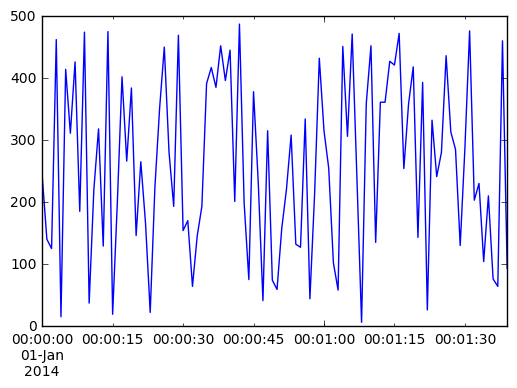

In [70]:
ts.plot()

In [71]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

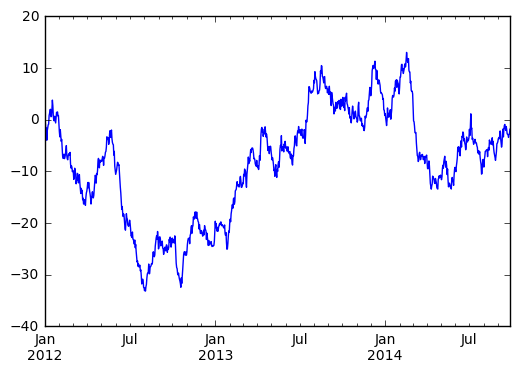

In [72]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [73]:
# Pandas plot function will print with labels as default

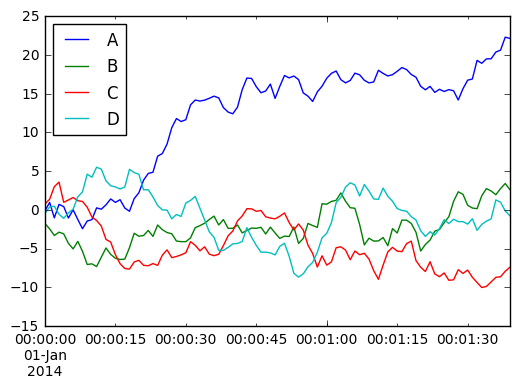

In [74]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas